<a href="https://colab.research.google.com/github/AkashSalmuthe/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Import All Required Libraries for EDA**

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np

# Importing libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/4. Unsupervised Learning/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

## **Get the overview of dataset**

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
#looking for any duplicates in dataset

df.duplicated().sum()
#len(df[df.duplicated()])

0



*   Dataset have **7787** rows and **12** features.
*   **director, cast, rating, country, date_added** has null or missing values
*   There are no duplicate values



## Looking for null values in dataset

In [7]:
#sum of all null values for each features

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

* Several features in dataset have null values.
* So to handel those null values in better way, lets look for percentage of null values in dataset.

In [8]:
# % Of null values

(df.isnull().sum()/df.shape[0])*100


show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

* Director feature have more than 30% of null values.
  - So droping feature director.
---
* Country feature have 6.51% of null values.
  - Filling null values by mode of feature.
---
* Cast feature have 9.22% of null values.
  - Filling null values by 'missing', only for EDA purpose.
---
* Rating feature have 0.09% of null values.
  - Filling null values by mode of feature.
---
* Date_added feature have 0.12% of null values.
  - Droping rows corresponding to this null values.

In [9]:
df.drop('director', axis=1, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df.dropna(subset=['date_added'], inplace=True)
df['cast'].fillna('missing', inplace=True)

In [10]:
#final check for null value

df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

* All the null values handeled and dataset is ready for next challenges.

## Looking for Data Types and Data Formats

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   cast          7777 non-null   object
 4   country       7777 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   object
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
dtypes: int64(1), object(10)
memory usage: 729.1+ KB


*    Out of 11 frature only release_year is int64 n all other are object
*    * Date_added feature have object datatype.
  - Converting to datetime datatype from object datetype.

---



---




In [12]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [13]:
df['date_added'].dtype

dtype('<M8[ns]')

#### Duration feature have object datatype

In [14]:
# Converting to int datatype from object datatype.

df['duration']

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7777, dtype: object

* Duration are in combination of int values and string.
* Removing string part so as to get int datatype.

In [15]:
#spliting each values by space and selecting int part at zeroth index

df['duration'] = df['duration'].apply(lambda x : x.split(" ")[0])

In [16]:
#check for updated duration values
df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   cast          7777 non-null   object        
 4   country       7777 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   object        
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 729.1+ KB


In [18]:
# setting limits for display of rows and columns for better understanding
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

## Creating some new features from existing features to understand data better.

In [19]:
# add new features from date feature
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

In [20]:
#Check for final dataset shape
df.shape

(7777, 14)

# **EDA**

## **Movies Vs TV Shows**

### Lets look at dominance between Movies and TV Shows.

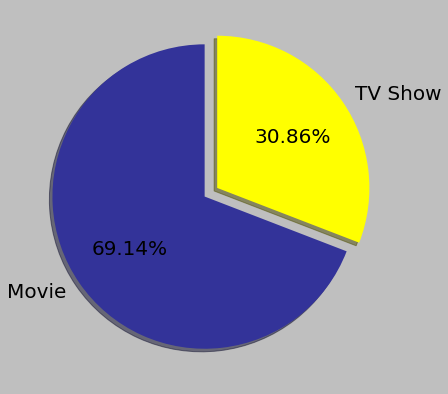

In [27]:
# Pie chart showing percentage of toal movies and TV shows.
# Choose this facecolor so as to give style of netflix

fig, ax = plt.subplots(figsize=(7,7),facecolor="#bfbfbf")
ax.patch.set_facecolor('#bfbfbf')
explode = (0, 0.1)
ax.pie(df['type'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Movie', 'TV Show'],shadow=True,
       startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['#333399','#ffff00'])
plt.show()

* Movies uploaded on Netflix are more than twice the TV Shows uploaded.
* This dose not implies that movies are more indulging that of TV Shows.
* Beacuase TV shows may have several seasons which consits of number of episodes.
* Duration of TV shows are much more that of movies.

## **Number of Movies and TV Shows added on netflix.**

### On Year basis

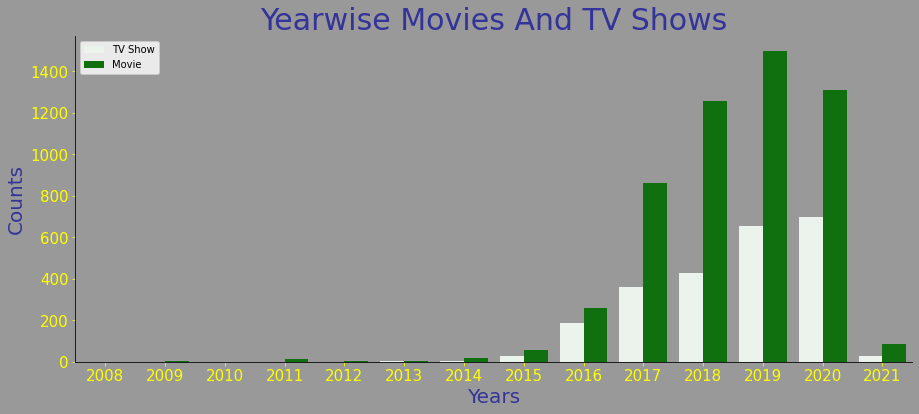

In [41]:
fig, ax = plt.subplots(figsize=(15,6),facecolor="#999999")
ax.patch.set_facecolor('#999999')
sns.countplot(x='year_added', hue='type',lw=5, color='green', data=df, ax=ax)
ax.tick_params(axis='x', colors='#ffff00',labelsize=15) 
ax.tick_params(axis='y', colors='#ffff00',labelsize=15)
ax.set_xlabel("Years", color='#333399', fontsize=20)
ax.set_ylabel("Counts",  color='#333399', fontsize=20)
ax.set_title("Yearwise Movies And TV Shows", color='#333399', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
plt.legend(loc='upper left')

* TV shows are incresing continuosly.
* Movies were incresing continuosly but after 2019 there is fall.

### On Month Basis

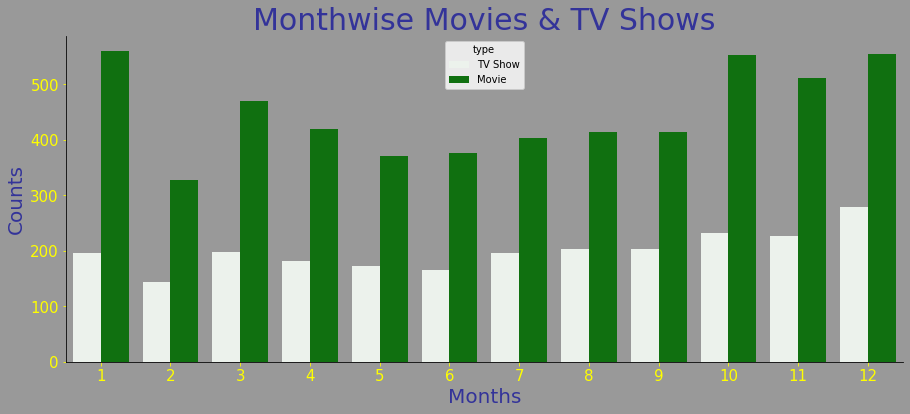

In [42]:
fig, ax = plt.subplots(figsize=(15,6),facecolor="#999999")
ax.patch.set_facecolor('#999999')
sns.countplot(x='month_added', hue='type',lw=5, color='green', data=df, ax=ax)
ax.tick_params(axis='x', colors='#ffff00',labelsize=15) 
ax.tick_params(axis='y', colors='#ffff00',labelsize=15)
ax.set_xlabel("Months", color='#333399', fontsize=20)
ax.set_ylabel("Counts",  color='#333399', fontsize=20)
ax.set_title("Monthwise Movies & TV Shows", color='#333399', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

* From Octomber to January, maximum number of movies and TV shows were added.
* Possible reason for that is, during this period of time events such as Christmas, New Year and several holidays takes place.

### On Day Basis

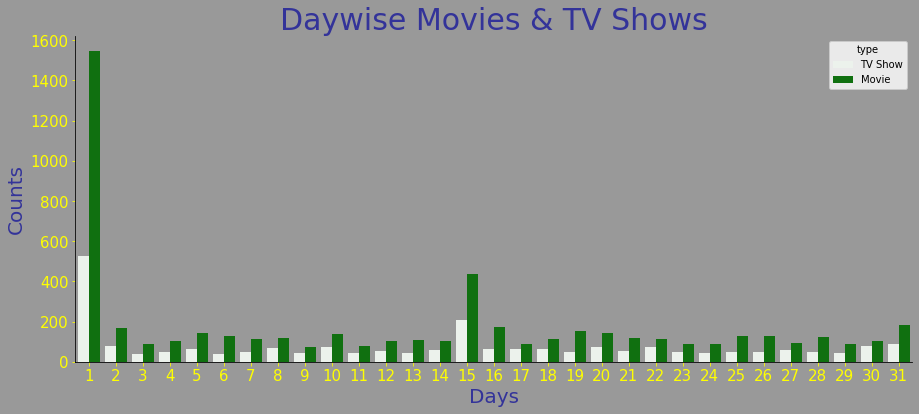

In [46]:
fig, ax = plt.subplots(figsize=(15,6),facecolor="#999999")
ax.patch.set_facecolor('#999999')
sns.countplot(x='day_added', hue='type',lw=5, color='green', data=df, ax=ax)
ax.tick_params(axis='x', colors='#ffff00',labelsize=15) 
ax.tick_params(axis='y', colors='#ffff00',labelsize=15)
ax.set_xlabel("Days", color='#333399', fontsize=20)
ax.set_ylabel("Counts",  color='#333399', fontsize=20)
ax.set_title("Daywise Movies & TV Shows", color='#333399', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

* Maximum number of movies and TV shows were either on start of the month or mid of the month. 

## Wordwide Presence of Netflix

* Popularity Netflix is all over the world.
* Lets look for its highest presence over countries.

### Top 10 Countries having maximum Movies and TV Shows

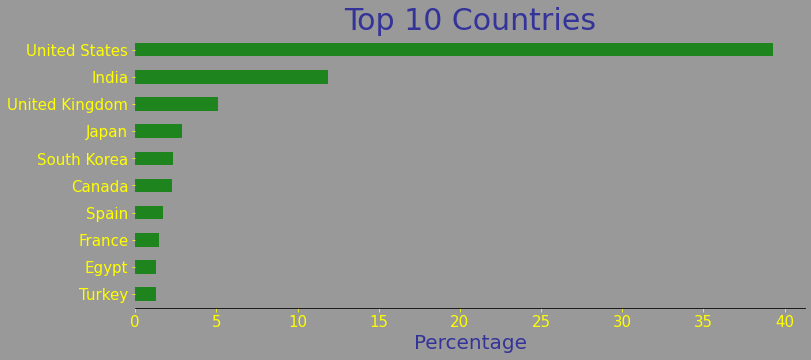

In [47]:
fig, ax = plt.subplots(figsize=(12,5),facecolor="#999999")
ax.patch.set_facecolor('#999999')
(df['country'].value_counts().sort_values()/df.shape[0]*100)[-10:].plot(kind='barh', ax=ax,color ='green',alpha=0.8)
ax.tick_params(axis= 'x', colors='#ffff00',labelsize=15) 
ax.tick_params(axis='y', colors='#ffff00',labelsize=15)
ax.set_xlabel("Percentage", color='#333399', fontsize=20)
ax.set_title("Top 10 Countries", color='#333399', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

* Unites State tops the in list of maximum number of movies and TV shows.
* Followed by India, UK and Japan.

## **Ratings on Movies and TV Shows**

**For Movies:**
* G: Kids
* PG: Older Kids (7+)
* PG-13: Teens (13+)
* NC-17, NR, R, Unrated: Adults (18+)


**For TV Shows:**
* TV-G, TV-Y: Kids
* TV-Y7/FV/PG: Older Kids (7+)
* TV-14: Young Adults (16+)
* TV-MA: Adults (18+)
